In [33]:
import numpy as np
import matplotlib.pyplot as plt
import glob

['30', '50']
938
938


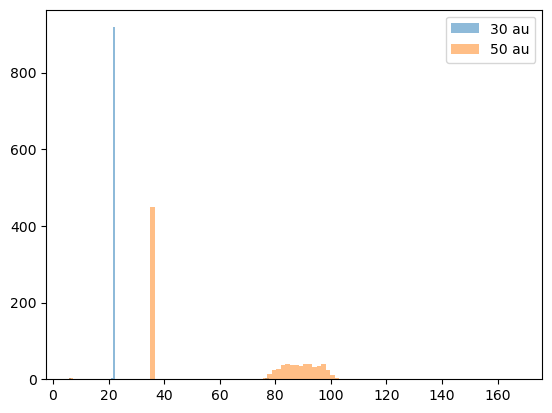

In [44]:
files = glob.glob('/home/ybadoux/Documents/MRP/acs_far_away_dist_test/results_far_away_dist_*.npy')
dists = [f.split('_')[-1].split('.')[0] for f in files]
print(dists)
for i,f in enumerate(files):
    results = np.load(f)
    
    print(len(results))
    plt.hist(results['end_time'], bins=100, alpha=0.5, label=f'{dists[i]} au')
plt.legend()
plt.show()

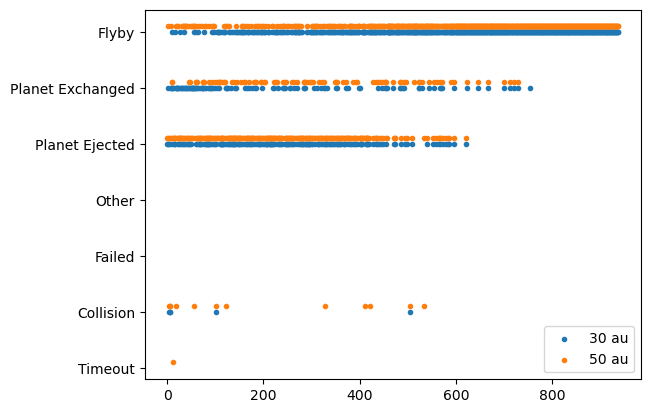

In [45]:
labels = {-1: 'Failed',
          -2: 'Collision',
          -3: 'Timeout',
          0: 'Other',
          1: 'Planet Ejected',
          2: 'Planet Exchanged',
          3: 'Flyby'}

plt.figure()
for i,f in enumerate(files):
    results = np.load(f)
    plt.scatter(results['index'], results['state'] + i/10, label=f'{dists[i]} au', marker='.')
plt.legend()
plt.yticks(list(labels.keys()), list(labels.values()))
plt.show()

In [57]:
result_list = []
for i,f in enumerate(files):
    results = np.load(f)
    result_list.append(results)

for col in result_list[0].dtype.names[:-3]:
    if any(result_list[0][col] != result_list[1][col]):
        print(f'Column {col} is different')
    else:
        print(f'Column {col} is the same')


Column a_sp is the same
Column v20 is the same
Column b is the same
Column phi is the same
Column theta is the same
Column psi is the same
Column f_pl is the same


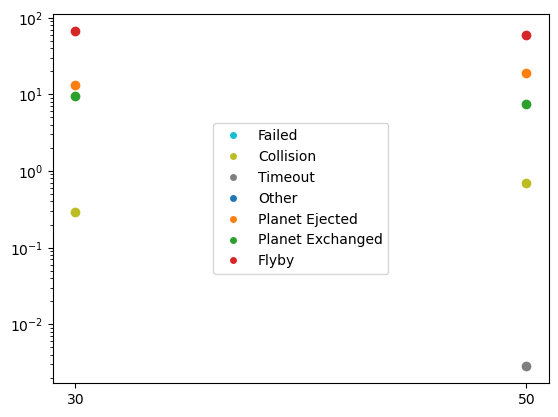

In [64]:
#get tab10 colors
colors = plt.cm.tab10.colors
for i,f in enumerate(files):
    results = np.load(f)

    for j in labels.keys():
        temp = results[results['state'] == j]
        if len(temp) == 0:
            bmax = 0
        else:
            bmax = np.max(temp['b'])
        cross_section = bmax**2 * len(temp)/len(results)
        error = np.sqrt(len(temp))/len(results) * cross_section
        plt.errorbar(dists[i], cross_section, yerr=error, fmt='o', color=colors[j])       
plt.semilogy()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], label=labels[i]) for i in labels.keys()]
plt.legend(handles=handles, loc='center')

plt.show()


In [ ]:
durations = [1312, 1777, 2144] #in seconds